In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import time

In [ ]:
demandPath = "/content/drive/MyDrive/Colab Notebooks/demand"
sourcesPath = "/content/drive/MyDrive/Colab Notebooks/sources"

demandCsv = os.listdir(demandPath)
print(len(demandCsv))
sourcesCsv = os.listdir(sourcesPath)
print(len(sourcesCsv))

1116
1116


In [1]:
# Demand dataframe
demandDf = pd.DataFrame()

for i in range(1116):
    try:
        df = pd.read_csv(os.path.join(demandPath, demandCsv[i]))
        print(df.iloc[288])
        df = df.drop(288)
        df = df.fillna(0)
        df.columns = df.columns.str.lower()
        demandDf = pd.concat([demandDf, df], ignore_index=True)
    except:
        continue
demandDf.head()

NameError: name 'pd' is not defined

In [ ]:
demandDf.to_csv('demand.csv', index=False)

SOURCES DF. 
THERE ARE DAYS THAT AT THE END SOME VALUES (WHOLE LOGS) ARE MISSING (MAX 10) WE REPLACE THEM WITH THE LAST KNOWN VALUE FOR THAT DAY SINCE AT THE END OF THE DAY (DEMAND=> SOURCES) DOESN'T FLUCTUATE LOT.

In [ ]:
## ftiaxnoume to df kai gia ka8e timh pou leipei sto telos ths hmeras sumplhrwnoume thn teleutaia dia8esimh timh mexri tis 23:55.
sourcesDf = pd.DataFrame()
for i in range(1116):
    try:
        df = pd.read_csv(os.path.join(sourcesPath, sourcesCsv[i]))
        df.columns = df.columns.str.lower()
        df = df.fillna(0)
        #if there is a value for 00:00 of next day remove it
        if len(df) > 288:
            df = df.drop(288)
            sourcesDf = pd.concat([sourcesDf, df], ignore_index=True)
        # if values are missing fill them
        elif len(df) < 288:
            missing_rows = 288 - len(df)       
            row = df.tail(1)
            sourcesDf = pd.concat([sourcesDf, df], ignore_index=True)
            for i in range(missing_rows):
                sourcesDf = pd.concat([sourcesDf, row], ignore_index=True)
        # if finally it's ok just add it        
        else:
            sourcesDf = pd.concat([sourcesDf, df], ignore_index=True)

    except:
        continue

In [ ]:
sourcesDf.head()

,time,solar,wind,geothermal,biomass,biogas,small hydro,coal,nuclear,natural gas,large hydro,batteries,imports,other
0,00:00,0.0,3952.0,971.0,214.0,178.0,459.0,10.0,2282.0,2321.0,3906.0,-104.0,6846.0,0.0
1,00:05,0.0,4037.0,971.0,215.0,178.0,460.0,10.0,2283.0,2422.0,4093.0,-41.0,6427.0,0.0
2,00:10,0.0,4040.0,970.0,215.0,178.0,459.0,10.0,2282.0,2366.0,4230.0,4.0,6204.0,0.0
3,00:15,0.0,4055.0,971.0,218.0,178.0,457.0,10.0,2282.0,2321.0,4252.0,12.0,6079.0,0.0
4,00:20,0.0,4075.0,971.0,217.0,178.0,432.0,10.0,2284.0,2147.0,4233.0,-2.0,6032.0,0.0


In [ ]:
sourcesDf.to_csv('sources.csv', index=False)

In [ ]:
##  INPUT  -> SINGLE COLUMN DF
##  RETURN -> A LIST WITH THE VALUES ACROSS TIME INTERVAL
# interval - h / d / w / m / y 
def reduce_data_size(dataframe, interval):
  
  data_list = []
  if interval == 'h':
    step_size = 12
  elif interval == 'd':
    step_size = 24*12
  elif interval == 'w':
      step_size = 7*24*12
  elif interval == 'm':
      step_size = 30*24*12
  elif interval == 'y':
      step_size = 365*24*12

  for i in range(0, len(dataframe), step_size):
      data = dataframe[i:i+step_size].mean()
      data_list.append(data)
  
  return data_list



In [ ]:
day_d = reduce_data_size(demandDf['current demand'], 'd')

In [ ]:
##  INPUT  -> SINGLE COLUMN DF
##  RETURN -> A LIST WITH THE MEAN VALUES ACROSS 5-MIN BLOCKS 
# interval - h / d / w / m / y 
def reduce_data_size(dataframe, interval):
  
  data_list = []
  if interval == 'h':
    step_size = 12
  elif interval == 'd':
    step_size = 24*12
  elif interval == 'w':
      step_size = 7*24*12
  elif interval == 'm':
      step_size = 30*24*12
  elif interval == 'y':
      step_size = 365*24*12

  for i in range(0, len(dataframe), step_size):
      data = dataframe[i:i+step_size].mean()
      data_list.append(data)
  
  return data_list

    A ERWTHMA -- DUCK CURVE

In [ ]:
# Mean Demand for each 2019 across 5-min block
d_2019 = np.zeros((288,))
d_2020 = np.zeros((288,))
d_2021 = np.zeros((288,))

s_2019 = np.zeros((288,))
s_2020 = np.zeros((288,))
s_2021 = np.zeros((288,))

day_step = 12*24
                                # 1-day
for i in range(0, len(demandDf), day_step):
               ##   year 2019   ##
  if i < 365*day_step:
    # demand
    d_2019 += np.array(demandDf['current demand'][i:i+ day_step])
    # source
    s_2019 += np.array(sourcesDf['solar'][i:i+ day_step])

              ##    year 2020   ##
  if i >= 365*day_step and i< 731*day_step:
    # demand
    d_2020 += np.array(demandDf['current demand'][i:i+ day_step])
    #source
    s_2020 += np.array(sourcesDf['solar'][i:i+ day_step])
  
            ##     year 2021   ##
  if i>= 731* day_step:
    # demand
    d_2021 += np.array(demandDf['current demand'][i:i+ day_step])
    # source
    s_2021 += np.array(sourcesDf['solar'][i:i+ day_step])


d_2019 = d_2019/ 365
d_2020 = d_2020/ 366 # disekto etos
d_2021 = d_2021/ 365

s_2019 = s_2019/ 365
s_2020 = s_2020/ 366 # disekto etos
s_2021 = s_2021/ 365

In [ ]:
### PLOTING


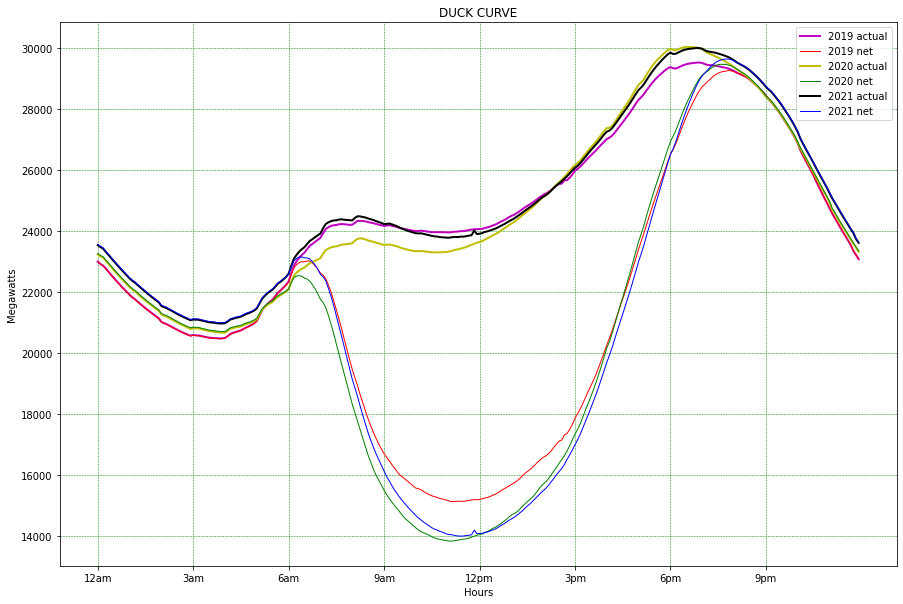

In [ ]:
plt.figure(figsize=(15, 10))
duck_2019 = (d_2019 - s_2019)
duck_2020 = (d_2020 - s_2020)
duck_2021 = (d_2021 - s_2021)
#2019
plt.plot(d_2019, color='m', linewidth=2)
plt.plot(duck_2019, color='r', linewidth=1)
#2020
plt.plot(d_2020, color='y', linewidth=2)
plt.plot(duck_2020, color='g', linewidth=1)
#2021
plt.plot(d_2021, color='k', linewidth=2)
plt.plot(duck_2021, color='b', linewidth=1)


x_ticks = [0,12*3,12*6,12*9,12*12,12*15,12*18,12*21]
x_labels = ['12am','3am', '6am','9am', '12pm', '3pm','6pm', '9pm']
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Hours')
plt.ylabel('Megawatts')
plt.title('DUCK CURVE')
plt.legend(["2019 actual", "2019 net","2020 actual", "2020 net","2021 actual", "2021 net"], loc='best')
plt.grid(color='g', linestyle='--', linewidth=0.5 )

In [ ]:
d_2021

B Erwthma - Outliers

In [ ]:
# Calculate mean values per day
def find_mean(dataframe):
  
  data_list = []
  step_size = 12*24

  for i in range(0, len(dataframe), step_size):
      data = dataframe[i:i+step_size].mean()
      data_list.append(data)
  
  return data_list


In [1]:
#Sum  all energy sources
sources_sum = pd.DataFrame()
data_list = []
for i in range(0, len(sourcesDf)):
  all = sourcesDf.iloc[i][1:].sum()
  data_list.append(all)
sources_sum['sources'] = data_list
sourcesDf.head()


NameError: name 'pd' is not defined

In [ ]:
sources_d = find_mean(sources_sum['sources'])

In [ ]:
demand_d = find_mean(demandDf['current demand'])

In [ ]:
input_data = []
for i in range(0,len(demand_d)):
  input_data.append([sources_d[i],demand_d[i]])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [ ]:
#centers = [[1, 1], [-1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = np.array(input_data)
#X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=2000, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
'''print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
'''

Estimated number of clusters: 1
Estimated number of noise points: 16


'print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))\nprint("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))\nprint("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))\nprint("Adjusted Rand Index: %0.3f"\n      % metrics.adjusted_rand_score(labels_true, labels))\nprint("Adjusted Mutual Information: %0.3f"\n      % metrics.adjusted_mutual_info_score(labels_true, labels))\nprint("Silhouette Coefficient: %0.3f"\n      % metrics.silhouette_score(X, labels))\n'

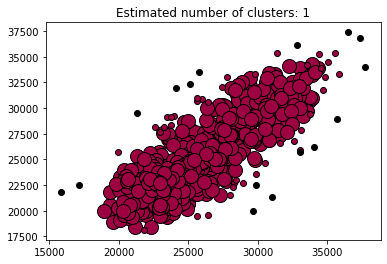

In [ ]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
#find the outlier days
from datetime import date,timedelta
outliers = []
for i in range(len(labels)):
  if labels[i] == -1:
    outliers.append(i)


start_date = date(2019,1,1)
outlier_dates = []
s = []
d = []

for num in outliers:
  outlier_dates.append(start_date+timedelta(days=num))
  s.append(sources_d[num])
  d.append(demand_d[num])
resultDf = pd.DataFrame()
resultDf['date'] = outlier_dates
resultDf['supply'] = s
resultDf['demand'] = d

print('The following dates where estimated as outliers: \n')
print(resultDf)

The following dates where estimated as outliers: 

          date        supply        demand
0   2019-03-09  24107.177083  31912.343750
1   2019-04-17  34062.465278  26186.944444
2   2019-05-07  33044.357639  25709.722222
3   2019-05-09  25793.329861  33506.548611
4   2019-06-22  31062.809028  21315.572917
5   2020-02-20  21309.777778  29518.288194
6   2020-02-24  29915.673611  22554.260417
7   2020-03-04  29661.375000  19986.763889
8   2020-05-08  35693.392361  28891.850694
9   2020-05-09  32824.048611  36145.121528
10  2020-05-12  37751.607639  33999.777778
11  2020-05-14  37356.149306  36866.256944
12  2020-05-15  36494.593750  37383.510417
13  2021-03-10  25166.048611  32327.805556
14  2021-09-29  15856.020833  21812.465278
15  2021-12-22  17182.572917  22533.288194


In [ ]:
demand_d[100]

28429.881944444445